In [1]:
# library imports
from importlib import reload
from copy import deepcopy
from Classes import ClusterObj, BlockObj, ScanDataObj
from Functions import CommonFunctions, ClassesFunctions
import pickle
import pandas as pd
reload(CommonFunctions)
reload(ClassesFunctions)
reload(ClusterObj)
reload(BlockObj)
reload(ScanDataObj)

print('Done!')

Done!


In [2]:
# path setup
path = "/Users/afarinaqs/Library/CloudStorage/Box-Box/Home Folder aa714/Private/BME LAB/Afi/OOD Detection/Data/P25_0114/"
input_file_name = 'Day7_S2_N7_SD4_5um'

image, scaled_image = CommonFunctions.load_image(file_name=input_file_name, path=path, debug=False, plot_images=False, rotation=0)
print(f'Loaded Image "{input_file_name}" {image.shape}')

# CommonFunctions.show(scaled_image)

Loaded Image "Day7_S2_N7_SD4_5um" (14400, 4400)


In [3]:
# load the saved work, or start over:
scan_data = ClassesFunctions.read_scan_data_from_pickle(
    file_name=input_file_name,
    path=path,
    start_over=False, # if True -> ignores the pickle, and returns None for initiating with the following functions
    plot_results=False,
    debug=False
)

reset = False
if scan_data is None or reset:
    print('Need to start over and make the dataset')
    start_over = True
else:
    print(f'Successfully loaded scan_data for "{input_file_name}"')
    start_over = False



Successfully loaded scan_data for "Day7_S2_N7_SD4_5um"


In [5]:
## Setting the parameters:
# start_over = True
scan_size = 5       # scanned at 5 or 10 µm
assay = 'SD4'       # put either "SD4" (screening D4) or "OF" (open format)
cAb_names = ['anti_cy5_0.7','anti_cy5_0.3','cAb49_DI','cAb49_Tre','cAb10_DI','cAb10_Tre','cAb35_DI','cAb35_Tre','cAb45_DI','cAb45_Tre','mix_cAbs','cAb28','mix_cAbs'] # can be None or [] too

In [6]:
# reset = True/False to overwrite start_over
ScanDataObj.init_or_reset_params(file_name=input_file_name, reset=start_over, input_param_dict=None, debug=False)


Skipping param initiation because they are already loaded from pickle files for Day7_S2_N7_SD4_5um


In [7]:
# todo: add a function for parameter tuning...

In [8]:
# test current parameters. can optimize them too if the results are not looking good.
if start_over:
    test_image = deepcopy(image)[100:1000,1400:3000] #(y,x) -> change if u want!

    # checkme takes too long
    # CommonFunctions.optimize_the_params(file_name=input_file_name, input_image=test_image, how_many_times=1, plot_images=False, debug=False)

    CommonFunctions.test_current_parameters(input_image=test_image, file_name=input_file_name, fig_size=[9,9], debug=False)

In [9]:
# start_over=True
if start_over or not scan_data.sorted_circles:
    CommonFunctions.do_initial_circle_finding(file_name=input_file_name, debug=False, plot_images=False)
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
else:
    sorted_circles, predicted_clusters_ids = [],[]

In [10]:
# start_over = True
if start_over:
    ClassesFunctions.init_blocks_dict(
        file_name=input_file_name, debug=False, plot_blocks=start_over,
        # debug_block_ids=['r0c0','r0c1','r0c2','r0c3'],
        init_offset=[-50,-40],
        block_size_adjustment=[120,120],
        block_distance_adjustment=[10,50],#xy
    )

In [11]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
scan_data = ScanDataObj.get_scan_data(input_file_name)

In [12]:
# start_over = False
if start_over:
    ClassesFunctions.init_clusters_dict(
        scan_data.sorted_circles,
        scan_data.predicted_clusters_ids,
        input_file_name,
        optimize_spots_coords=False,
        debug=False, debug_clusters_ids=[])
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [13]:
# connect clusters and blocks (and final initiation stuff)
# start_over = True
if start_over:
    ClassesFunctions.connect_clusters_to_blocks(file_name=input_file_name,debug=False,debug_clusters=[],debug_blocks=[],plot_images=False,)
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [14]:
# print(test_block.full_report(1))

There are 12 clusters in total.

 

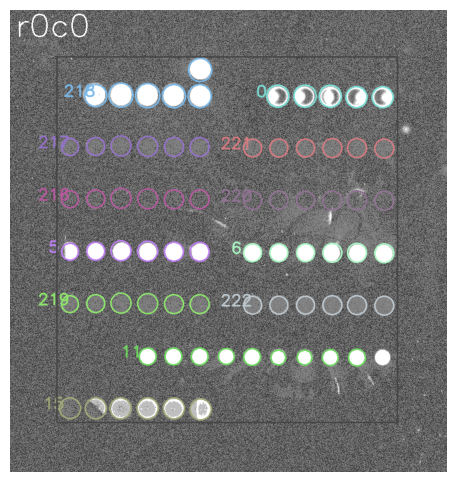

In [16]:
## Making the first template of cluster patterns
# start_over=True

test_ind = f'r0c0'
test_block: BlockObj.Block = scan_data.get_block(test_ind)
if start_over:
    scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)
    manual_spot_edit_dict = {
        5:['change_r all r+1','add 1 to r','add 3 clusters above d=100','add 1 cluster below d=100',],
        15:['add 1 to l','move spot-1 2 r'],6:['add 1 to l','add 2 clusters above d=100','add 1 cluster below d=100',],
        218:['change_r all r+4','move all 3 d','del spot0','add 1 to r','move spot-1 50 u, 48 l']
    }
    test_block.edit_block(debug=0, plot_before_after=False, overwrite=True,with_restore=True,
                          manual_spot_edit_dict=manual_spot_edit_dict)
    test_mask = test_block.create_block_mask(debug=False, plot_images=False)

else:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

N = len(test_block.clusters_ids_list)
print(f'There are {N} clusters in total.')
test_block.plot_block(fig_size=[6, 6], debug=False, with_border=True, crop_to_mask=True)



In [17]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [18]:
start_over

False

In [19]:
# generating the list to edit each row at the same time
generate_list = lambda n: [f'r{n}c{i}' for i in range(scan_data.block_ncol)]
rows_names_list = []
for r in range(scan_data.block_nrow):
    rows_names_list.append(generate_list(r))

['r0c0', 'r0c1', 'r0c2', 'r0c3']

 

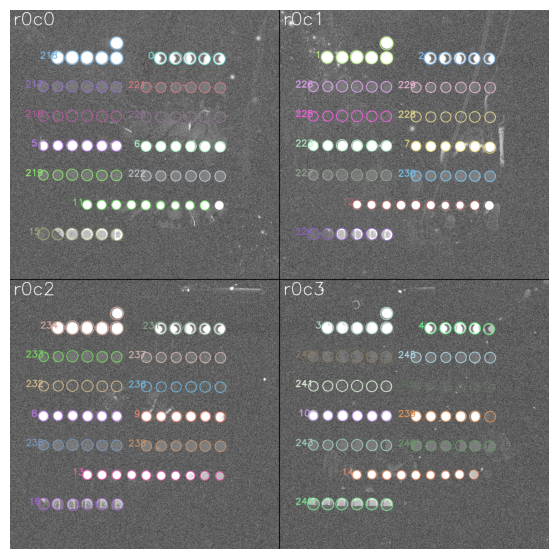

In [22]:
# row 0
r = 0
# plot_results = False if start_over else True
plot_results=False
current_list = rows_names_list[r]
fig_size = [8,8] if scan_data.assay == 'SD4' else [15,15]
print(current_list)
# start_over=1

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={'r0c1':[0,0],'r0c2':[0,-300],'r0c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c2'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            # 15:['del']
        }
    )

else:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [1288]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

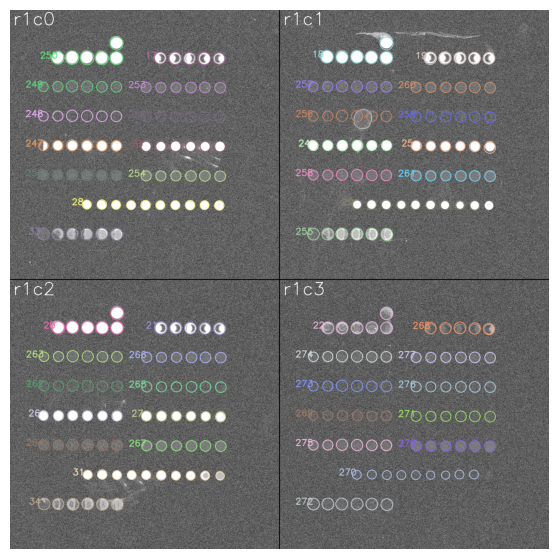

In [1289]:
## row 1
r = 1
current_list = rows_names_list[r]
# start_over=1
if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        move_whole_block_match={'r1c0':[-50,0],'r1c1':[0,0],'r1c2':[0,0]},
        manual_spot_edit_dict={30:['del'],  32:['del']
        }
    )

else:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [1290]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

['r2c0', 'r2c1', 'r2c2', 'r2c3']

 

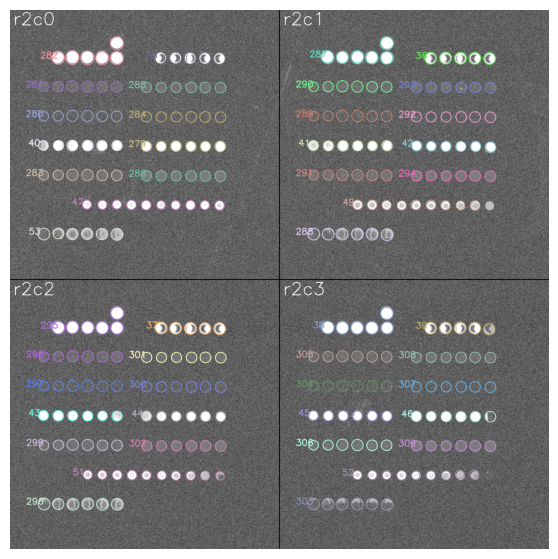

In [1291]:
# row 2
r = 2
current_list = rows_names_list[r]
print(current_list)
# start_over=1

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r2c0':[0,0],'r2c1':[10,0],'r2c2':[90,30],'r2c3':[-30,-194]},
        manual_spot_edit_dict={
            48:['del'],50:['del']
        }
    )

else:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [1292]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

['r3c0', 'r3c1', 'r3c2', 'r3c3']

 

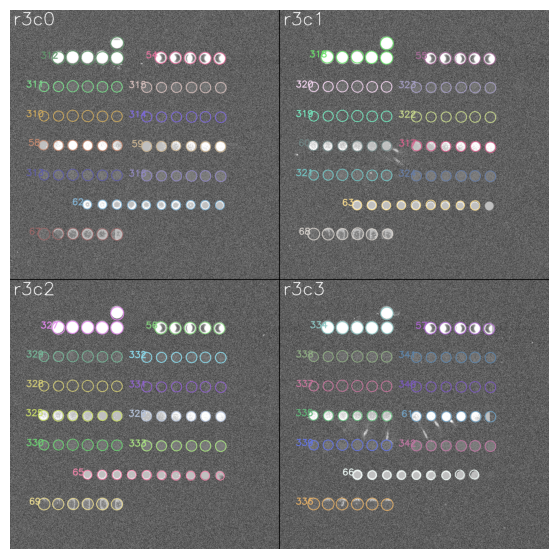

In [1293]:
# row 3
r = 3
current_list = rows_names_list[r]
print(current_list)
# start_over = True

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        move_whole_block_match={'r3c0':[0,0],'r3c2':[-50,0],'r3c3':[-100,0]},
        manual_spot_edit_dict={
            64:['del']
        }
    )

else:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)



In [1294]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [1295]:
# row 4
r = 4
# start_over = 1
current_list = rows_names_list[r]
print(current_list)

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r4c0':[0,0],'r4c1':[0,0],'r4c2':[0,0],'r4c3':[50,0]},
        manual_spot_edit_dict={
            102:['del']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r4c0', 'r4c1', 'r4c2', 'r4c3']


In [1296]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [1297]:
# row 5
r = 5
current_list = rows_names_list[r]
print(current_list)
# start_over = 1

if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r5c0':[0,0],'r5c1':[0,0], 'r5c2':[0,-100]},
        manual_spot_edit_dict={
            102:['del']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r5c0', 'r5c1', 'r5c2', 'r5c3']


In [1298]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

['r6c0', 'r6c1', 'r6c2', 'r6c3']

 

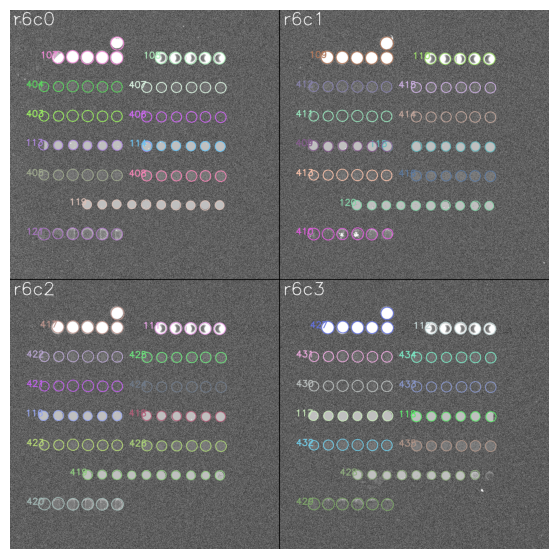

In [1299]:
# row 6
r = 6
current_list = rows_names_list[r]
print(current_list)
# start_over = 1
if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        # move_whole_block_match={'r6c1':[20,20],'r6c2':[100,0]},
        manual_spot_edit_dict={
            136:['del spot0']
        }
    )

else:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [1300]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1301]:
##### row 7
r = 7
current_list = rows_names_list[r]
print(current_list)
# start_over = 1
if start_over:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        move_whole_block_match={'r7c0':[-100,0], 'r7c1':[-120,0],'r7c2':[-350,0],'r7c3':[0,0], },
        manual_spot_edit_dict={
            132:['del']
        }
    )

elif plot_results:
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r7c0', 'r7c1', 'r7c2', 'r7c3']


In [1302]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

['r8c0', 'r8c1', 'r8c2', 'r8c3']

 

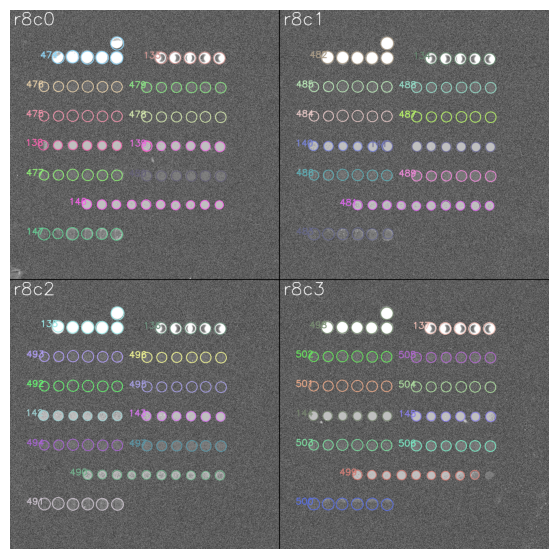

In [1303]:
##### row 8
# start_over=True

if scan_data.block_nrow > 8:
    r = 8
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
            debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
            preprocess_params=scan_data.preprocess_params, plot_before_after=0,
            move_whole_block_match={'r8c0':[0,0], 'r8c1':[0,0],'r8c2':[0,0],},
            manual_spot_edit_dict={
                167:['del'], 174:['del'], 177:['del'],
            }
        )

    else:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [1304]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1305]:
##### row 9
# start_over = 1
if scan_data.block_nrow > 8:
    r = 9
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N, fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r9c0':[-50,0],'r9c2':[0,0]},
            manual_spot_edit_dict={
                181:['del'], 187:['del'],
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r9c0', 'r9c1', 'r9c2', 'r9c3']


In [1306]:
if start_over:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1307]:
##### row 10
# start_over = 1
if scan_data.block_nrow > 8:
    r = 10
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N, fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r10c0':[-50,0],'r10c1':[-100,0]},
            manual_spot_edit_dict={
                # 139:['change_r all r+1','move spot0 3 l, 6 d']
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)



['r10c0', 'r10c1', 'r10c2', 'r10c3']


In [1308]:
if start_over:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1309]:
##### row 11
# start_over = 1
if scan_data.block_nrow > 8:
    r = 11
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r11c0':[0,0],'r11c1':[0,0],'r11c2':[-50,0]},
            manual_spot_edit_dict={
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r11c0', 'r11c1', 'r11c2', 'r11c3']


In [1310]:
if start_over:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1311]:
##### row 12
# start_over = 1
if scan_data.block_nrow > 8:
    r = 12
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r12c1': [-100,0],'r12c2': [0,0],'r12c3': [-350,0],},
            manual_spot_edit_dict={
                194:['del']
            }
        )

    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r12c0', 'r12c1', 'r12c2', 'r12c3']


In [1312]:
if start_over:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1313]:
##### row 13
# start_over=1
if scan_data.block_nrow > 8:
    r = 13
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r13c1': [0,0], 'r13c3': [0,0],},
            manual_spot_edit_dict={
            }
        )
    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r13c0', 'r13c1', 'r13c2', 'r13c3']


In [1314]:
if start_over:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1315]:
    ##### row 14
# start_over = 1
if scan_data.block_nrow > 8:
        r = 14
        current_list = rows_names_list[r]
        print(current_list)

        if start_over:
            ClassesFunctions.edit_multiple_blocks(
                current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N, fig_size=fig_size,
                debug=0, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
                move_whole_block_match={'r14c0':[-20,0],'r14c1':[-20,0],'r14c2':[0,-10],'r14c3':[0,0],},
                manual_spot_edit_dict={
                }
            )

        elif plot_results:
            ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


['r14c0', 'r14c1', 'r14c2', 'r14c3']


In [1316]:
if start_over:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1317]:
# scan_data.get_block('r15c0').update_block_start_end_from_clusters_min_max()

['r15c0', 'r15c1', 'r15c2', 'r15c3']

 

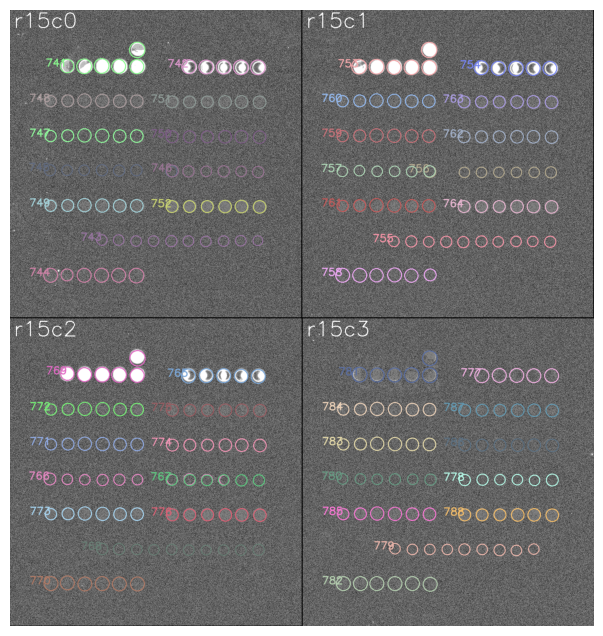

In [1318]:
##### row 15
start_over = 1
if scan_data.block_nrow > 8:
    r = 15
    current_list = rows_names_list[r]
    print(current_list)

    if start_over:
        ClassesFunctions.edit_multiple_blocks(
            current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,fig_size=fig_size,
            debug=False, debug_blocks=[''], plot_before_after=0, preprocess_params=scan_data.preprocess_params,
            move_whole_block_match={'r15c0':[-20,0],'r15c1':[-20,0],'r15c2':[-20,100],'r15c3':[0,0],},
            manual_spot_edit_dict={
            }
        )


    elif plot_results:
        ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list)


In [1319]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
start_over = 0

In [1320]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)


In [1333]:
scan_data.cAb_names =  ['anti_cy5_0.7','anti_cy5_0.3','cAb49_DI','cAb49_Tre','cAb10_DI','cAb10_Tre','cAb35_DI','cAb35_Tre','cAb45_DI','cAb45_Tre','mix_cAbs','cAb28','mix_cAbs']
scan_data.cAb_names

['anti_cy5_0.7',
 'anti_cy5_0.3',
 'cAb49_DI',
 'cAb49_Tre',
 'cAb10_DI',
 'cAb10_Tre',
 'cAb35_DI',
 'cAb35_Tre',
 'cAb45_DI',
 'cAb45_Tre',
 'mix_cAbs',
 'cAb28',
 'mix_cAbs']

In [1334]:
## Additional test info and labeling
scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)
test_info = {'Ag': 'Omicron', 'dAb': 'dAb34'}

if scan_data.assay =='OF':
    curve_num_points = 8
    start_Ag_conc = 250
    dilution_factor = 2
    num_rep = 3
    num_blank_rows_at_bottom = 1
    test_info['start_blocks'] = ['r0c0','r0c1','r0c2']
    blank_rows = [scan_data.block_nrow - x - 1 for x in range(num_blank_rows_at_bottom)]
    weird_dilution = False
else:
    curve_num_points = 16
    start_Ag_conc = 250
    dilution_factor = 2
    num_rep = 4
    num_blank_rows_at_bottom = 2
    test_info['start_blocks'] = ['r0c0','r0c1','r0c2','r0c3']
    scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)
    blank_rows = [scan_data.block_nrow - x - 1 for x in range(num_blank_rows_at_bottom)]
    weird_dilution = True

def add_labels(info_dict,debug=False, SD4_weird_dilution=False):
    for start_block_id in info_dict['start_blocks']:
        start_block = scan_data.get_block(start_block_id)
        start_block.dAb_label = info_dict['dAb']
        start_block.target = info_dict['Ag']
        start_block.Ag_conc = start_Ag_conc
        start_block.add_names_to_clusters(debug=debug)
        CommonFunctions.debug_report(f'{start_block_id}',debug)
        for n in range(1,curve_num_points):
            new_r = start_block.row_number + n
            new_block = scan_data.get_block(f'r{new_r}c{start_block.col_number}')
            new_block.dAb_label = info_dict['dAb']
            new_block.target = info_dict['Ag']
            if not SD4_weird_dilution:
                new_block.Ag_conc = start_Ag_conc/dilution_factor**(n) if new_r not in blank_rows else 0
            else:
                if new_block.row_number % 2 == 0:
                    new_block.Ag_conc = start_Ag_conc/dilution_factor**(int(n/2)) if new_r not in blank_rows else 0
                elif new_block.row_number % 2 == 1:
                    new_block.Ag_conc = (start_Ag_conc*0.75)/dilution_factor**(int((n-1)/2)) if new_r not in blank_rows else 0
            new_block.add_names_to_clusters(debug=debug)
            CommonFunctions.debug_report(f'r{new_r}c{start_block.col_number}',debug)
add_labels(info_dict=test_info, debug=0, SD4_weird_dilution=weird_dilution)
# ClassesFunctions.save_dicts_in_pickle(path=path)xx/

In [1335]:
scan_data.get_block('r2c0').Ag_conc

125.0

In [1336]:
# scan_data.get_block('r1c0').plot_block(description='cAb_names')

In [1337]:
out_dfs = []
sigma1 = 1.5
sigma2 = 2

# this one goes row by row:
for r in range(scan_data.block_nrow):
    block_ids_list = rows_names_list[r]
    out_df, counts = ClassesFunctions.measure_signal_of_blocks(
        block_ids_list=block_ids_list,
        file_name=input_file_name,
        sigma1=sigma1,
        sigma2=sigma2,
        fg_inc_pixels=1,
        margin_pixels=3,
        bg_r=6,
        debug=0,
        debug_blocks_ids=[''],
        plot_images=0,
    )
    out_dfs.append(out_df)
#     total_counts += counts1



r0c0 ....
r0c1 ....
r0c2 ....
r0c3 ....
delete1: 11143 (11.3233%), delete2: 768 (0.7804%) -> total delete: 12.10%
r1c0 ....
r1c1 ....
r1c2 ....
r1c3 ....
delete1: 11732 (12.1108%), delete2: 128 (0.1321%) -> total delete: 12.24%
r2c0 ....
r2c1 ....
r2c2 ....
r2c3 ....
delete1: 16514 (17.1378%), delete2: 640 (0.6642%) -> total delete: 17.80%
r3c0 ....
r3c1 ....
r3c2 ....
r3c3 ....
delete1: 13956 (14.0538%), delete2: 1536 (1.5468%) -> total delete: 15.60%
r4c0 ....
r4c1 ....
r4c2 ....
r4c3 ....
delete1: 16118 (16.4860%), delete2: 1024 (1.0474%) -> total delete: 17.53%
r5c0 ....
r5c1 ....
r5c2 ....
r5c3 ....
delete1: 15873 (16.5165%), delete2: 1152 (1.1987%) -> total delete: 17.72%
r6c0 ....
r6c1 ....
r6c2 ....
r6c3 ....
delete1: 14646 (15.3214%), delete2: 128 (0.1339%) -> total delete: 15.46%
r7c0 ....
r7c1 ....
r7c2 ....
r7c3 ....
delete1: 12427 (12.4980%), delete2: 512 (0.5149%) -> total delete: 13.01%
r8c0 ....
r8c1 ....
r8c2 ....
r8c3 ....
delete1: 15761 (16.4878%), delete2: 1152 (1.2

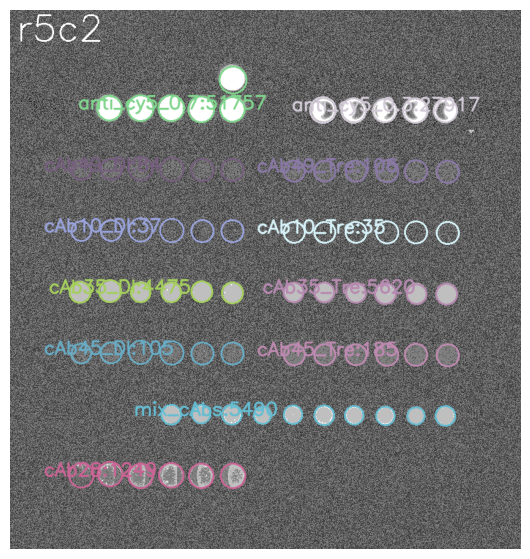

Empty DataFrame
Columns: [Block_ID, Col, Row, Ag_Conc., target, dAb_name, cAb_name, Cluster_ID, Spot_Index, F, B, F_B, F_B_PostProcess, Average_F_B_PostProcess]
Index: []

In [1352]:
# wanna see everything for Z in rXcY:
cAb = 'anti_cy5'
row_id = 5
block_id = f'r{row_id}c2'
df1 = out_dfs[row_id]
df = df1[(df1['cAb_name']==cAb) & (df1['Block_ID']==block_id)]
scan_data.get_block(block_id).plot_block(description='cAb:intensities', crop_to_mask=1)
# print(df)
df

In [1327]:
# formated_path

In [1339]:
dosave=True
formated_path = path + input_file_name + '_scan_values'

if dosave:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    intensities_df = pd.concat(out_dfs, ignore_index=True)
    with open(formated_path+'.pickle', 'wb') as file:
        pickle.dump(intensities_df, file)

    intensities_writer = pd.ExcelWriter(formated_path + '.xlsx')
    intensities_df.to_excel(intensities_writer, index=True)
    intensities_writer.close()


    print(f'saved intensities_df {intensities_df.shape}.')

else:
    with open(formated_path+'.pickle', 'rb') as file:
        intensities_df = pickle.load(file)
        print(f'loaded intensities_df {intensities_df.shape}')


intensities_df

saved intensities_df (4823, 14).


Block_ID  Col  Row  Ag_Conc.   target dAb_name      cAb_name  Cluster_ID  \
0        r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
1        r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
2        r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
3        r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
4        r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
...       ...  ...  ...       ...      ...      ...           ...         ...   
4818    r15c3    3   15       0.0  Omicron    dAb34         cAb28         782   
4819    r15c3    3   15       0.0  Omicron    dAb34         cAb28         782   
4820    r15c3    3   15       0.0  Omicron    dAb34         cAb28         782   
4821    r15c3    3   15       0.0  Omicron    dAb34         cAb28         782   
4822    r15c3    3   15       0.0  Omicron    dAb34         cAb28         782   

      Spot_Index      F    B    F_B  F_B_PostProcess  Average_F_B_PostProcess  
0              0  44167  122  44045     44045.959789             42260.673430  
1              1  40674  124  40550     40550.452315             42260.673430  
2              2  42807  128  42679     42679.702175             42260.673430  
3              3  45993  130  45863              NaN             42260.673430  
4              4  42960  127  42833     42833.988506             42260.673430  
...          ...    ...  ...    ...              ...                      ...  
4818           1    165  112     53        53.152221                41.194902  
4819           2    147  112     35        35.036417                41.194902  
4820           3    152  113     39        39.254188                41.194902  
4821           4    153  113     40        40.468318                41.194902  
4822           5    152  114     38        38.063365                41.194902  

[4823 rows x 14 columns]

In [1340]:
# to see what has been deleted.....
subset = intensities_df[intensities_df['F_B_PostProcess'].isnull()]

block_cab_pairs = set(zip(subset['Block_ID'], subset['cAb_name']))

filtered_df = intensities_df[
    intensities_df[['Block_ID', 'cAb_name']].apply(tuple, axis=1).isin(block_cab_pairs)
]

print(filtered_df.shape)
filtered_df.head(18)


(3994, 14)


Block_ID  Col  Row  Ag_Conc.   target dAb_name      cAb_name  Cluster_ID  \
0      r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
1      r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
2      r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
3      r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
4      r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
5      r0c0    0    0     250.0  Omicron    dAb34  anti_cy5_0.7         218   
11     r0c0    0    0     250.0  Omicron    dAb34      cAb49_DI         217   
12     r0c0    0    0     250.0  Omicron    dAb34      cAb49_DI         217   
13     r0c0    0    0     250.0  Omicron    dAb34      cAb49_DI         217   
14     r0c0    0    0     250.0  Omicron    dAb34      cAb49_DI         217   
15     r0c0    0    0     250.0  Omicron    dAb34      cAb49_DI         217   
16     r0c0    0    0     250.0  Omicron    dAb34      cAb49_DI         217   
17     r0c0    0    0     250.0  Omicron    dAb34     cAb49_Tre         221   
18     r0c0    0    0     250.0  Omicron    dAb34     cAb49_Tre         221   
19     r0c0    0    0     250.0  Omicron    dAb34     cAb49_Tre         221   
20     r0c0    0    0     250.0  Omicron    dAb34     cAb49_Tre         221   
21     r0c0    0    0     250.0  Omicron    dAb34     cAb49_Tre         221   
22     r0c0    0    0     250.0  Omicron    dAb34     cAb49_Tre         221   

    Spot_Index      F    B    F_B  F_B_PostProcess  Average_F_B_PostProcess  
0            0  44167  122  44045     44045.959789             42260.673430  
1            1  40674  124  40550     40550.452315             42260.673430  
2            2  42807  128  42679     42679.702175             42260.673430  
3            3  45993  130  45863              NaN             42260.673430  
4            4  42960  127  42833     42833.988506             42260.673430  
5            5  41320  127  41193     41193.264368             42260.673430  
11           0    261  113    148       148.581576               132.877912  
12           1    248  116    132       132.313181               132.877912  
13           2    247  121    126       126.689737               132.877912  
14           3    251  124    127       127.078759               132.877912  
15           4    290  126    164              NaN               132.877912  
16           5    254  125    129       129.726306               132.877912  
17           0    279  118    161       161.533201               154.246839  
18           1    270  118    152       152.217047               154.246839  
19           2    282  123    159       159.653122               154.246839  
20           3    278  127    151       151.085917               154.246839  
21           4    265  129    136              NaN               154.246839  
22           5    271  125    146       146.744907               154.246839

In [1341]:
grouped = intensities_df.groupby(['Ag_Conc.', 'Row', 'Col', 'target', 'cAb_name', 'dAb_name'])['Average_F_B_PostProcess'].mean().reset_index()
grouped = grouped.sort_values(by=['Row', 'Col'])

if num_rep == 4 and curve_num_points==4:
    grouped['dAb_cAb_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}_" +
                                           ("0" if x['Row'] % 2 == 0 and x['Col'] % 2 == 0 else
                                            "1" if x['Row'] % 2 == 1 and x['Col'] % 2 == 0 else
                                            "2" if x['Row'] % 2 == 0 and x['Col'] % 2 == 1 else
                                            "3"), axis=1)
elif num_rep == 3:
    grouped['dAb_cAb_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}_" +
                                           ("0" if x['Col'] % 3 == 0 else
                                            "1" if x['Col'] % 3 == 1 else
                                            "2"), axis=1)

elif num_rep == 2:
    grouped['dAb_cAb_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}_" +
                                           ("0" if x['Row'] % 2 == 0 else "1"), axis=1)

elif num_rep == 1:
    grouped['dAb_cAb_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}", axis=1)

elif num_rep == 4 and curve_num_points==16:
    grouped['dAb_cAb_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}_" +
                                           ("0" if x['Col'] % 4 == 0 else
                                            "1" if x['Col'] % 4 == 1 else
                                            "2" if x['Col'] % 4 == 2 else
                                            "3"), axis=1)

grouped[grouped['cAb_name']=='cAb10'].head(10)



Empty DataFrame
Columns: [Ag_Conc., Row, Col, target, cAb_name, dAb_name, Average_F_B_PostProcess, dAb_cAb_rep]
Index: []

In [1342]:
results_df = grouped.pivot_table(index=['target', 'Ag_Conc.'], columns=[ 'dAb_cAb_rep'],
                                 values='Average_F_B_PostProcess').sort_values(by='Ag_Conc.',ascending=False)
print(results_df.shape)
results_df


(15, 48)


dAb_cAb_rep         dAb34_anti_cy5_0.3_0  dAb34_anti_cy5_0.3_1  \
target  Ag_Conc.                                                 
Omicron 250.000000          24805.412980          26349.797368   
        187.500000          26391.740701          25489.380004   
        125.000000          26323.609432          26702.138929   
        93.750000           26606.880554          27001.764567   
        62.500000           27643.023321          27099.091055   
        46.875000           26811.156409          28969.193622   
        31.250000           27062.285870          28965.191489   
        23.437500           28535.582520          30400.517662   
        15.625000           27385.771668          27486.535506   
        11.718750           28272.136198          28759.836531   
        7.812500            29620.624185          29587.291799   
        5.859375            27713.468102          28302.557611   
        3.906250            26845.418063          26402.011910   
        2.929688            24445.586569          26012.855530   
        0.000000            23261.731863          25041.330753   

dAb_cAb_rep         dAb34_anti_cy5_0.3_2  dAb34_anti_cy5_0.3_3  \
target  Ag_Conc.                                                 
Omicron 250.000000          27284.178192          32049.066968   
        187.500000          27194.754059            244.091423   
        125.000000          28389.190782          28458.213765   
        93.750000           26947.681928          29382.595012   
        62.500000           29590.574993          26617.207739   
        46.875000           27917.709522          28365.969392   
        31.250000           27137.074290          28481.960124   
        23.437500           30999.951461          30197.762920   
        15.625000           28710.154769          29037.436258   
        11.718750           28576.132094          29587.731116   
        7.812500            29120.363922          30086.566560   
        5.859375            28435.032593          30947.426262   
        3.906250            28042.138163          28322.330663   
        2.929688            26903.655632          27523.443554   
        0.000000            25749.629500          13311.180899   

dAb_cAb_rep         dAb34_anti_cy5_0.7_0  dAb34_anti_cy5_0.7_1  \
target  Ag_Conc.                                                 
Omicron 250.000000          42260.673430          47536.414371   
        187.500000          43617.950528          48636.527486   
        125.000000          43785.124128          48257.267444   
        93.750000           44001.006399          48596.360791   
        62.500000           43486.217760          53602.136717   
        46.875000           41613.988214          52935.322154   
        31.250000           45620.881822          48958.188794   
        23.437500           44918.367664          47782.850758   
        15.625000           42619.889984          49243.288596   
        11.718750           46694.118400          53108.329633   
        7.812500            47731.026718          53779.749407   
        5.859375            49297.693769          49890.560976   
        3.906250            45870.302788          48848.971918   
        2.929688            42195.792845          47162.084321   
        0.000000            38258.915729          46419.648961   

dAb_cAb_rep         dAb34_anti_cy5_0.7_2  dAb34_anti_cy5_0.7_3  \
target  Ag_Conc.                                                 
Omicron 250.000000          37341.431497          40547.109395   
        187.500000          49615.785761           1274.618515   
        125.000000          50151.023072          50061.696902   
        93.750000           49728.230982          50042.847198   
        62.500000           49533.804746          49452.429532   
        46.875000           51757.009835          51963.582161   
        31.250000           50836.671905          51030.063851   
        23.437500           49535.967

In [1343]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

formated_path = path + input_file_name + '_summary'
results_writer = pd.ExcelWriter(formated_path + '.xlsx')
results_df.to_excel(results_writer, index=True)
results_writer.close()

with open(formated_path+'.pickle', 'wb') as file:
    pickle.dump(results_df, file)
